---
title: "Regression"
---

### Import Libraries

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("../data/processed/cleaned_movies_reg.csv")

Prepare data frame for regression analysis by encoding categorical variables and defining targets.

In [24]:
# Encode categorical variables as strings or one-hot later
categorical_cols = ["Age_Rating", "Franchise_Name", "Country", "Language"]

# For now, just keep them as-is or you can choose to encode them later
df_full = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define targets
targets = ["Revenue_Normalized", "Average_Rating"]

# Drop target columns
X = df_full.drop(columns=targets)

# define a function to run regression analysis
def run_regression(df, X, target_col):    
    # Select only rows with non-null target
    df = df[df[target_col].notna()].copy()

    # Define features and targets separately
    X = df[X.columns]
    y = df[target_col]

    # scale numerical features
    scaler = StandardScaler()
    numeric_cols = X.select_dtypes(include='number').columns
    dummy_cols = X.select_dtypes(exclude='number').columns
    # scale column, preserving alignment
    X_numeric_scaled = pd.DataFrame(
        scaler.fit_transform(X[numeric_cols]),
        columns=numeric_cols,
        index=X.index
    )
    # rejoin with dummy columns
    X_scaled = pd.concat([X_numeric_scaled, X[dummy_cols]], axis=1)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Initialize and train model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = lr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Linear Regression MSE: {mse:.2f}")
    print(f"Linear Regression R^2: {r2:.3f}")

    # Plot results
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel(f"True {target_col}")
    plt.ylabel(f"Predicted {target_col}")
    plt.title(f"Regression: {target_col} Prediction")
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
    plt.show()

Linear Regression MSE: 0.41
Linear Regression R^2: 0.583


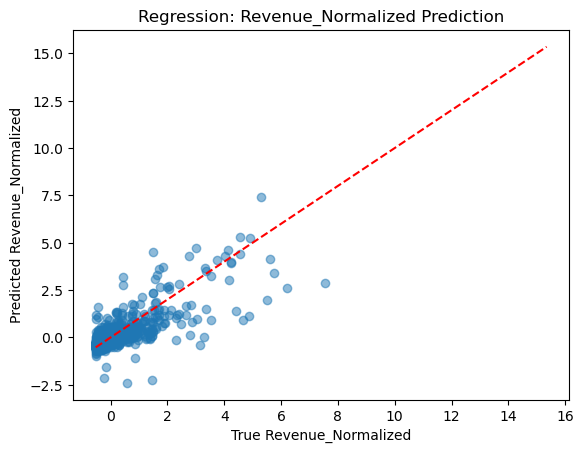

Linear Regression MSE: 1.84
Linear Regression R^2: 0.032


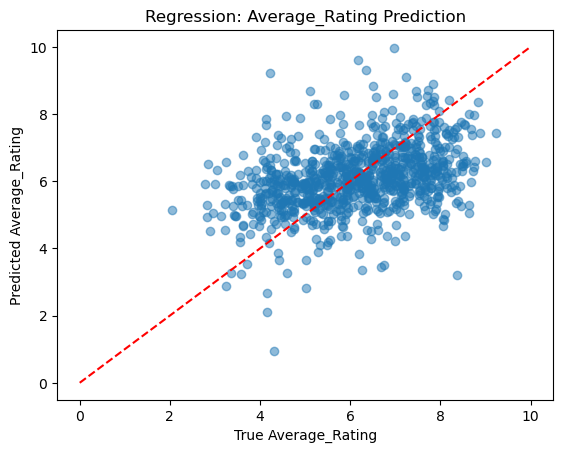

In [25]:
# Run regression for each target
for target in targets:
   run_regression(df_full, X, target)

### Re-run regression with Network Attributes Added